In [7]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

# Project Proposal- Pumpkin Seed Identification

## Introduction

In this project, we have twelve characteristics of pumpkin seeds with 2 possible classifications. This data set includes 2500 pumpkin seeds with 1200 of “Ürgüp Sivrisi” and 1300 of “Çerçevelik” . Classification between the two types of pumpkin seeds is vital due to its role in the seed sector and is challenging to identify, therefore with our model, we will be able to sort through and classify between the 2 seed types.

The question we will be answering is, **\"Given random dimensions/parameters of an unknown seed, is the seed type “Ürgüp Sivrisi” or “Çerçevelik” based on a k-nearest neighbors classification model?**
 
For visualization we will be using 2 parameters (roundness and area) however while building our model, at the moment, we will take in all parameters. 

This data set involves 2 types of pumpkin seeds, “Ürgüp Sivrisi” and “Çerçevelik” which were grown in Turkey with the inclusion of 12 morphological features. All data values are numerical with Class being the only exception, numbers are measurements of pixels and the ratios between them.

## Preliminary Exploratory Data Analysis

In our preliminary exploratory Data Analysis, we are able to fully read our data from the web into R and noticed to not have any NA values (uploaded and pulled from GitHub). There was no missing data. There were 1300 observations under the "Çerçevelik" seed type and 1200 under the "Urgup Sivrisi" seed type. In our printed table below, we summarzied mean, minimum and maximum data points from both classes. We analyzed the area, roundness and perimeter as our most important observations. Below is also a visualization of the two classes with area and roundness as the quantitative varibles identifying the difference between the 2 seed types. 

In [8]:
#tiding
pumpkin_data<-read_csv("Pumpkin_Seeds_Dataset.csv")
pumpkin_data[pumpkin_data=="Çerçevelik"]<-"Cercevelik"
pumpkin_data[pumpkin_data=="Ürgüp Sivrisi"]<-"Urgup Sivrisi"
pumpkin_data<-pumpkin_data%>%mutate(Class=as_factor(Class))
pumpkin_data

Parsed with column specification:
cols(
  Area = col_double(),
  Perimeter = col_double(),
  Major_Axis_Length = col_double(),
  Minor_Axis_Length = col_double(),
  Convex_Area = col_double(),
  Equiv_Diameter = col_double(),
  Eccentricity = col_double(),
  Solidity = col_double(),
  Extent = col_double(),
  Roundness = col_double(),
  Aspect_Ration = col_double(),
  Compactness = col_double(),
  Class = col_character()
)



Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Cercevelik
76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Cercevelik
71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Cercevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Urgup Sivrisi
80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Urgup Sivrisi
84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Urgup Sivrisi


In [4]:
#Summarizing Data
# there is no NA values in our data set
sum(is.na(pumpkin_data))
nrow(pumpkin_data)
Cercevelik_data <- pumpkin_data %>%
                   filter(Class == "Cercevelik")
nrow(Cercevelik_data)
Urgup_Sivrisi_data <- pumpkin_data %>%
                   filter(Class == "Urgup Sivrisi")
nrow(Urgup_Sivrisi_data)
# summarise the mean data value for both Cercevelik and Urgup Sivrisi
pumpkin_data_mean <- pumpkin_data %>%
group_by(Class) %>%
summarise(across(everything(), list(mean = mean)))%>%
select(Class, Area_mean, Roundness_mean, Perimeter_mean)

# summarise the min data value for both Cercevelik and Urgup Sivrisi
pumpkin_data_min <- pumpkin_data %>%
group_by(Class) %>%
summarise(across(everything(), list(min = min)))%>%
select( Area_min, Roundness_min, Perimeter_min)

# summarise the max data value for both Cercevelik and Urgup Sivrisi
pumpkin_data_max <- pumpkin_data %>%
group_by(Class) %>%
summarise(across(everything(), list(max = max)))%>%
select(Area_max, Roundness_max, Perimeter_max)

total_observations<- c(nrow(Cercevelik_data),nrow(Urgup_Sivrisi_data))
table_observations<- data.frame(total_observations)

na_values <- c(sum(is.na(pumpkin_data)), sum(is.na(pumpkin_data)))
na_table <- data.frame (na_values)

combined_table_1 <- bind_cols (pumpkin_data_mean, pumpkin_data_max, pumpkin_data_min,table_observations, na_table)
combined_table_flip<- t(combined_table_1)

print(combined_table_flip)

[1] 0

[1] 2500

[1] 1300

[1] 1200

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



                   [,1]         [,2]           
Class              "Cercevelik" "Urgup Sivrisi"
Area_mean          "78423.15"   "83079.54"     
Roundness_mean     "0.8274985"  "0.7525698"    
Perimeter_mean     "1089.522"   "1174.432"     
Area_max           "107476"     "136574"       
Roundness_max      "0.9396"     "0.8967"       
Perimeter_max      "1416.303"   "1559.450"     
Area_min           "55811"      "47939"        
Roundness_min      "0.6153"     "0.5546"       
Perimeter_min      "888.242"    "868.485"      
total_observations "1300"       "1200"         
na_values          "0"          "0"            


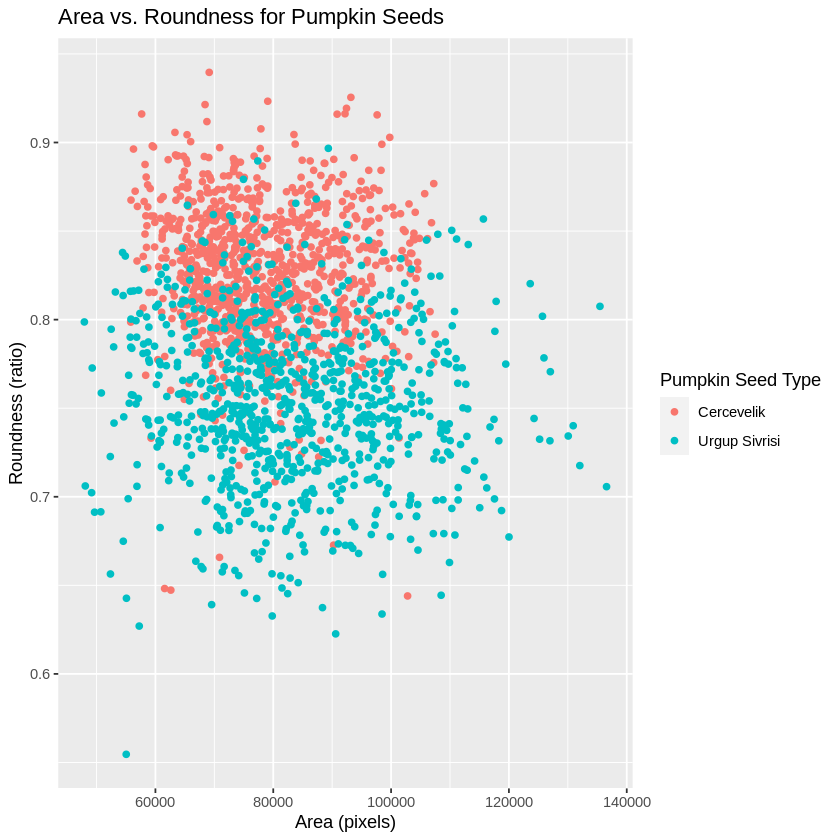

In [5]:
#Visualization
pumpkin_split<-initial_split(pumpkin_data, prop = 0.75, strata = Class)
pumpkin_train <- training(pumpkin_split)
pumpkin_test <- testing(pumpkin_split)

pumpkin_visualization <- ggplot(pumpkin_train, aes(x = Area, y = Roundness, color = Class)) +
                         geom_point() +
                         labs(x = "Area (pixels)", y = "Roundness (ratio)", color = "Pumpkin Seed Type") + 
                         ggtitle("Area vs. Roundness for Pumpkin Seeds")

pumpkin_visualization

## Methods

We will be using the k-nearest neighbours algorithm to classify between the 2 seed types. First we will be spliting our data into the training set, and the testing set using 75% and 25% of the data respectively. Using the training set, we would first use 5 fold cross validation to determine the most accurate k value to use with our model. That will allow us to build our actual testing model with the most accurate K and use our testing data to see how accurate it is in predicting. From our understanding of the data and the supplement article, we discovered area, roundness and perimeter are 3 important parameters to consider and include during the main project. One way to visualize this data would be with a scatter plot because the variables are quantitative.

Source: https://doi.org/10.1007/s10722-021-01226-0

## Expected Outcomes and Significance

We expect to find classification of data showing 1 of 2 types of pumpkin seeds based on the new, unseen pumpkin seed data. 

This model with the correct identificaiton of seed will impact the seed sector in Turkey which currently finds trouble identifying differences between the different seeds.

Future questions could involve whether this model's predictions can be used with similar types of pumpkin seeds and whether other pumpkin seeds are confused with one of the 2 seeds we have analyzed.